# Analyzing images of singledoubletriple xs lines

## Initialization

In [16]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)
sys.path.append(os.path.dirname(module_path))
from py.tools.config import cfg
import py.tools.logs as logs
import py.vid.v_tools as vt
import py.metrics.m_SDT as me
from py.im.imshow import imshow
import py.file.file_handling as fh
import py.vid.noz_detect as nt
import pandas as pd
LOGGERDEFINED = logs.openLog('still_measure.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

In [ ]:
folder = os.path.join(cfg.path.server, r'SDT\SO_S85-0.05\I_SO9-S85-0.05_S_3.00\I_SO9-S85-0.05_S_3.00_230512\disturbXS2_2_+y_0.500')
file = os.path.join(folder, 'disturbXS2_2_+y_0.500_vstill_HIx2_l1d2o2_I_SO9-S85-0.05_S_3.00_230512_122056_0.png')
vs = me.fileXSSDT(file, diag=1)

# summarize

## +z

In [10]:
fstr = r'SDT'
folder = os.path.join(cfg.path.server, fstr)
sv = me.summarizerXSSDT(folder, dire='+z', overwriteMeasure=False, overwriteSummary=True)

In [11]:
sv.run()
sv.export()

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS\I_PDMSS10_S_3.00\I_PDMSS10_S_3.00_230822\disturbXS2_1_+z_0.500\disturbXS2_1_+z_0.500_summary_I_PDMSS10_S_3.00_230822_162656_7.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS\I_PDMSS10_S_3.00\I_PDMSS10_S_3.00_230822\disturbXS2_1_+z_0.625\disturbXS2_1_+z_0.625_summary_I_PDMSS10_S_3.00_230822_162522_8.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS\I_PDMSS10_S_3.00\I_PDMSS10_S_3.00_230822\disturbXS2_1_+z_0.750\disturbXS2_1_+z_0.750_summary_I_PDMSS10_S_3.00_230822_162820_5.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS\I_PDMSS10_S_3.00\I_PDMSS10_S_3.00_230822\disturbXS2_1_+z_0.875\disturbXS2_1_+z_0.875_summary_I_PDMSS10_S_3.00_230822_163112_0.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS\I_PDMSS10_S_3.00\I_PDMSS10_S_3.00_230822\disturbXS

In [50]:
sv.folderErrorList

[]

In [26]:
sv.testFolderError(1, openFolder=True)

{'folder': '//cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\\SDT\\SO_S85-0.05\\I_SO9-S85-0.05_S_3.50\\I_SO9-S85-0.05_S_3.50_230512\\disturbXS2_3_+z_1.000', 'error': AttributeError("'list' object has no attribute 'line'")}


AttributeError: 'list' object has no attribute 'line'

# +y

In [18]:
# fstr = r'SDT'
fstr = r'SDT'
folder = os.path.join(cfg.path.server, fstr)
svy = me.summarizerXSSDT(folder, dire='+y', overwriteMeasure=False, overwriteSummary=False)

In [19]:
svy.run()
svy.export()

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\summaries\XS+ySDTSummaries.csv
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\summaries\XS+ySDTSummaries_gname.csv
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\summaries\XS+ySDTFailures.csv


In [51]:
svy.folderErrorList

[]

In [36]:
svy.testFolderError(1, openFolder=True)

{'folder': '//cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\\SDT\\SO_S85-0.05\\I_SO10-S85-0.05_S_3.50\\I_SO10-S85-0.05_S_3.50_230516\\disturbXS2_2_+y_1.000', 'error': AttributeError("'list' object has no attribute 'line'")}


AttributeError: 'list' object has no attribute 'line'

## evaluating errors

### initialize the test object

In [3]:
ft = me.failureTest(os.path.join(cfg.path.fig, 'SDT', 'summaries', 'XS+ySDTFailures.csv'), me.fileXSSDT)

932 failed files, 300 failed folders, 871 unchecked folders, 881 total folders


### iterate through folders to check measurements and approve if correct or redoing

1. if correct, approve folder
2. if needs to be redone, approve the folder, then measureSummarize
3. if pictures need to be redone, export stills, then testFolder again, then go back to step 1

,file,error
0,successes,NaN
1,l0w1o1,no vals detected


,line,usedML


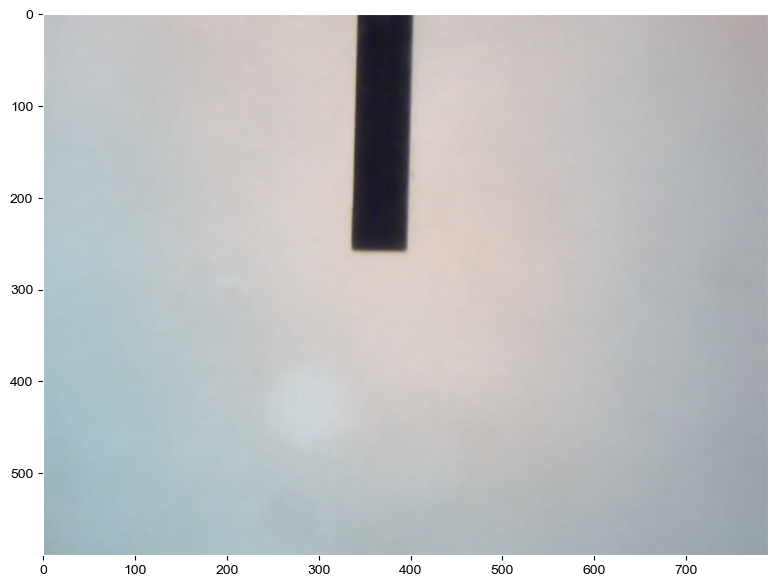

In [1149]:
fostr = ft.firstBadFolder()
ft.testFolder(fostr, diag=1)
ft.sw.showFailures()
ft.sw.openBackground()

In [1155]:
ft.approveFolder(fostr)

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\SO\I_SO9_S_3.50\I_SO9_S_3.50_230207\disturbXS2_1_+y_0.625\disturbXS2_1_+y_0.625_failures_I_SO9_S_3.50_230207_145216_0.csv
468 failed files, 167 failed folders, 738 unchecked folders, 881 total folders


save progress

In [1156]:
ft.export()

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\summaries\XS+ySDTFailures.csv


### make corrections to folders

#### redo measurements

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\SO\I_SO10_S_3.00\I_SO10_S_3.00_230725\disturbHoriz3_3_1.000\disturbHoriz3_3_1.000_nozDims_I_SO10_S_3.00_230725_150803_0.csv


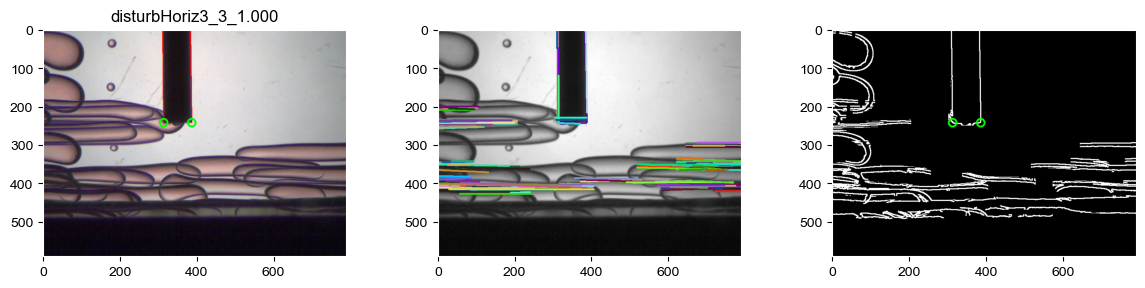

In [78]:
ft.sw.detectNozzle(overwrite=True, diag=2, bgmode=0, modes=[4], frameGetMode=0)

In [826]:
ft.sw.adjustNozzle()

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\SO\I_SO11_S_3.00\I_SO11_S_3.00_230727\disturbXS2_3_+y_0.875\disturbXS2_3_+y_0.875_background_I_SO11_S_3.00_230727_155253_3.png


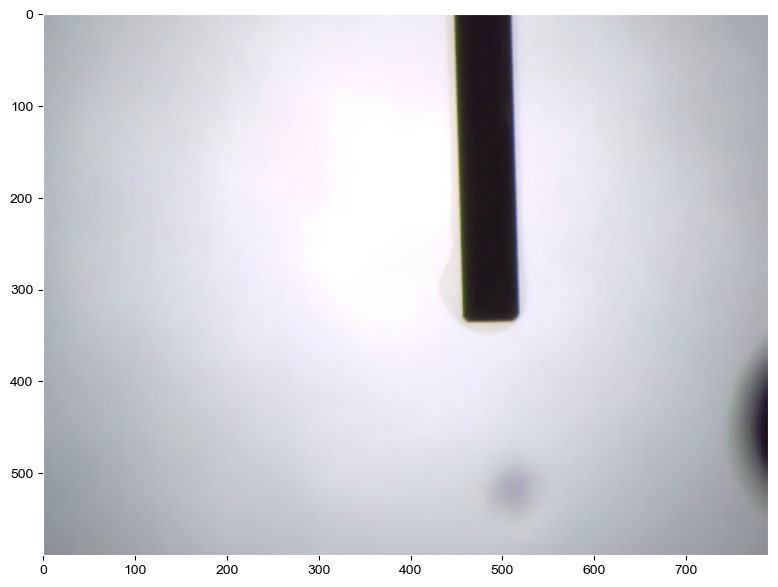

In [814]:
ft.sw.exportBackground(overwrite=True, diag=1, ymin=10, curveFit=False, numpics=4, mode=2)

In [815]:
ft.sw.analyze(overwriteMeasure=True, overwriteSummary=True, useML=False, overrideSegment=True, overwriteCropLocs=True)

INFO: Exported disturbXS2_3_+y_0.875_Usegment_HIx3_l0w1o1_I_SO11_S_3.00_230727_155253_3.png
INFO: Exported disturbXS2_3_+y_0.875_Usegment_HIx3_l0w1o2_I_SO11_S_3.00_230727_155253_3.png
INFO: Exported disturbXS2_3_+y_0.875_Usegment_HIx3_l0w1_I_SO11_S_3.00_230727_155253_3.png
INFO: Exported disturbXS2_3_+y_0.875_Usegment_HIx3_l0w2o1_I_SO11_S_3.00_230727_155253_3.png
INFO: Exported disturbXS2_3_+y_0.875_Usegment_HIx3_l0w2o2_I_SO11_S_3.00_230727_155253_3.png
INFO: Exported disturbXS2_3_+y_0.875_Usegment_HIx3_l0w2_I_SO11_S_3.00_230727_155253_3.png
INFO: Exported disturbXS2_3_+y_0.875_Usegment_HIx3_l0w3o1_I_SO11_S_3.00_230727_155253_3.png
INFO: Exported disturbXS2_3_+y_0.875_Usegment_HIx3_l0w3o2_I_SO11_S_3.00_230727_155253_3.png
INFO: Exported disturbXS2_3_+y_0.875_Usegment_HIx3_l0w3_I_SO11_S_3.00_230727_155253_3.png
INFO: Exported disturbXS2_3_+y_0.875_Usegment_HIx3_l1w1o1_I_SO11_S_3.00_230727_155253_3.png
INFO: Exported disturbXS2_3_+y_0.875_Usegment_HIx3_l1w1o2_I_SO11_S_3.00_230727_155253_

In [24]:
newcl = True
ft.sw.testAllFailures(diag=0,  overrideSegment=True, useML=False, overwriteCropLocs=newcl, exportCropLocs=newcl)

disturbXS2_1_+y_1.250_vstill_HIx1_l0d1_I_PDMSS10_S_3.50_230822_135430_4.png
INFO: Exported disturbXS2_1_+y_1.250_Usegment_HIx1_l0d1_I_PDMSS10_S_3.50_230822_135430_4.png
disturbXS2_1_+y_1.250_vstill_HIx1_l1d1_I_PDMSS10_S_3.50_230822_135430_4.png
INFO: Exported disturbXS2_1_+y_1.250_Usegment_HIx1_l1d1_I_PDMSS10_S_3.50_230822_135430_4.png
disturbXS2_1_+y_1.250_vstill_HIx1_l2d1_I_PDMSS10_S_3.50_230822_135430_4.png
INFO: Exported disturbXS2_1_+y_1.250_Usegment_HIx1_l2d1_I_PDMSS10_S_3.50_230822_135430_4.png
disturbXS2_1_+y_1.250_vstill_HIx1_l3d1_I_PDMSS10_S_3.50_230822_135430_4.png
INFO: Exported disturbXS2_1_+y_1.250_Usegment_HIx1_l3d1_I_PDMSS10_S_3.50_230822_135430_4.png


INFO: Exported disturbXS2_1_+y_0.625_Usegment_HIx1_l1w1o1_I_SO9_S_3.50_230207_145216_0.png
INFO: Exported disturbXS2_1_+y_0.625_Usegment_HIx1_l1w1o2_I_SO9_S_3.50_230207_145216_0.png


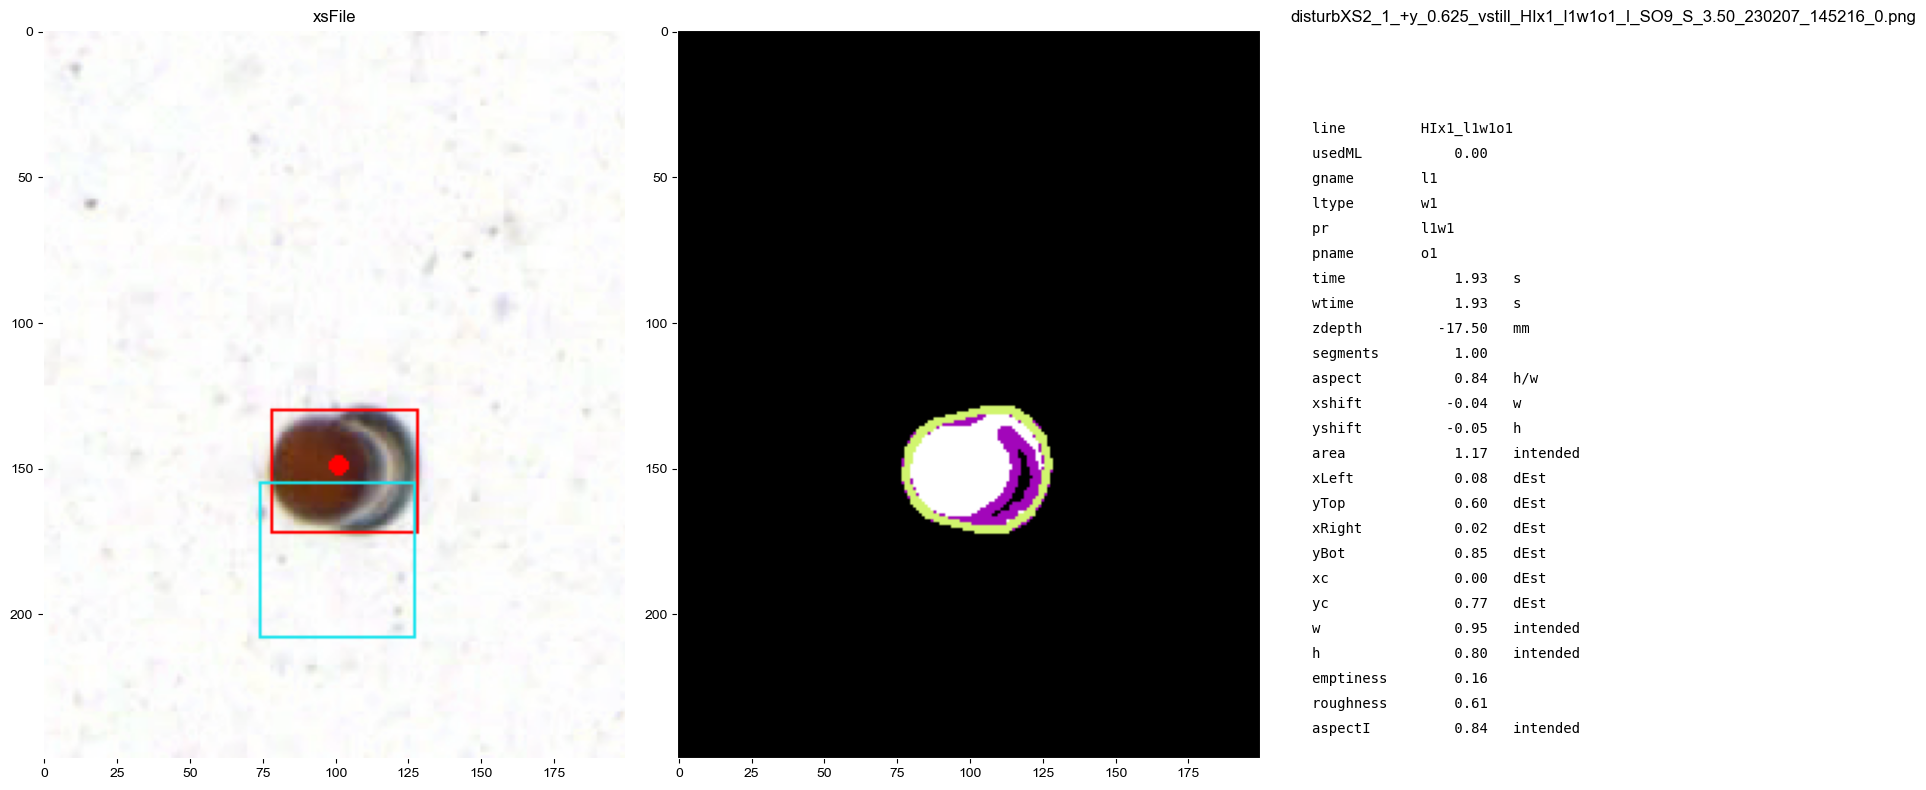

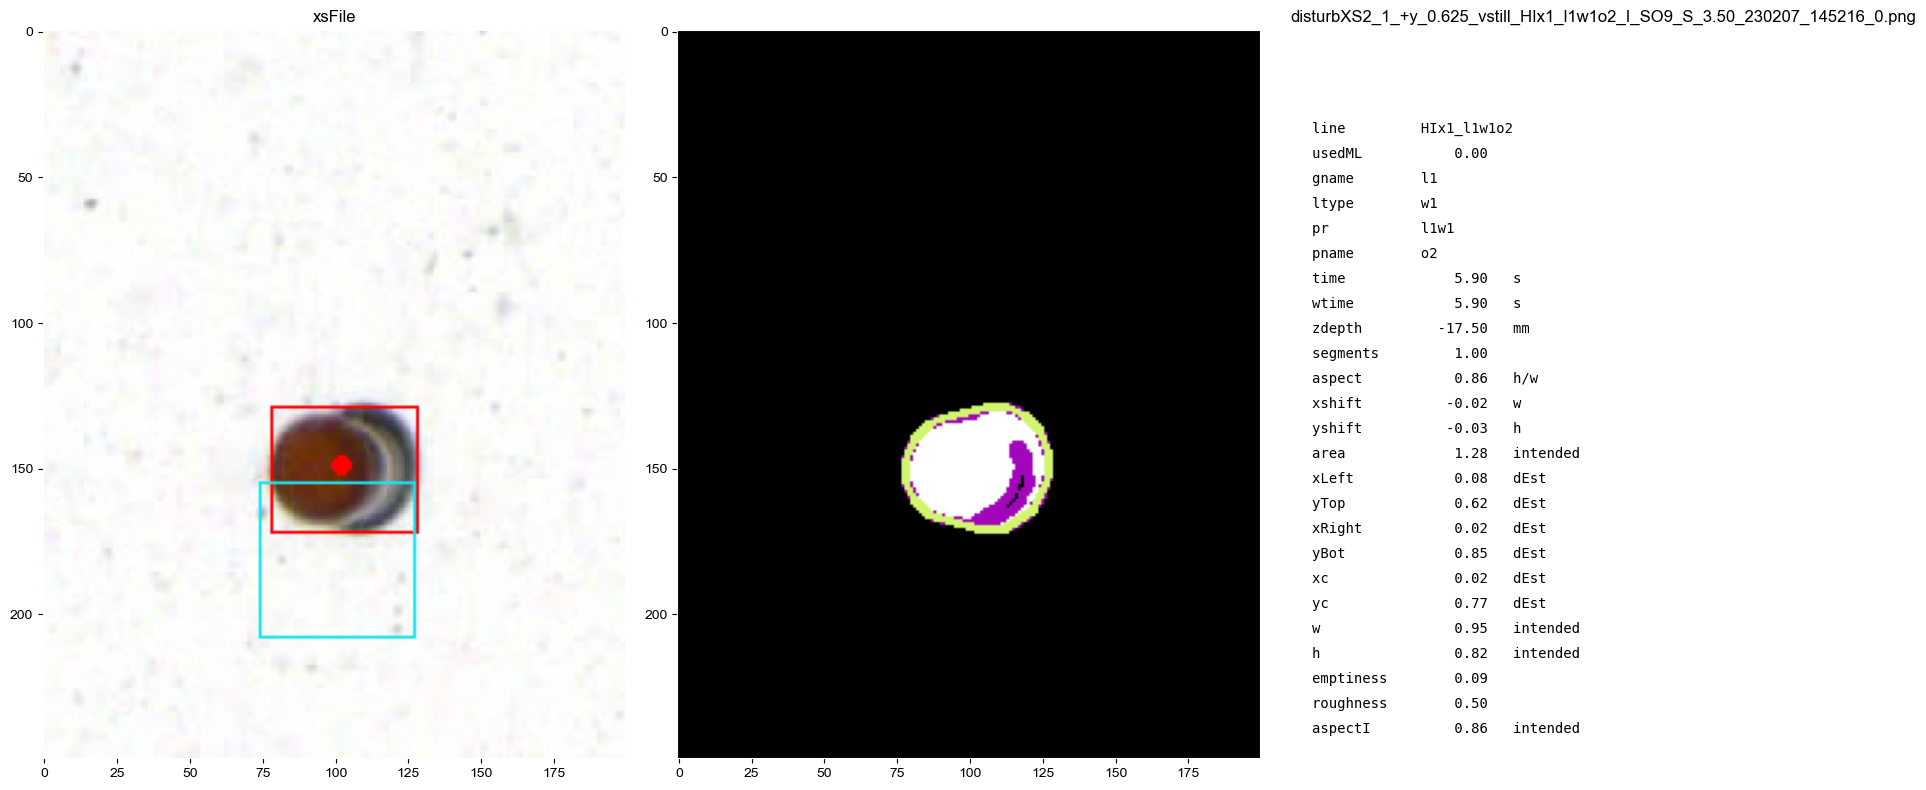

In [1153]:
newcl = True
tag = 'l1w1o'
if len(tag)>3:
    diag = 1
else:
    diag = 0
ft.sw.testImage(tag, diag=diag, overrideSegment=True, useML=False
                , overwriteCropLocs=newcl, exportCropLocs=newcl, acrit=400)

In [1099]:
ft.sw.openLastImage(scrollDown=0.5, scrollRight=0, dropper=False)

In [902]:
ft.sw.openLastSeries(nmax=2, scrollDown=0.5, scrollRight=0, dropper=True)

In [1120]:
ft.sw.whiteOutLast()

INFO: Whited out \SDT\SO\I_SO9_S_3.00\I_SO9_S_3.00_230207\disturbXS2_2_+y_0.500\disturbXS2_2_+y_0.500_vstill_HIx2_l0d2o1_I_SO9_S_3.00_230207_114550_7.png
INFO: Blacked out \SDT\SO\I_SO9_S_3.00\I_SO9_S_3.00_230207\disturbXS2_2_+y_0.500\Usegment\disturbXS2_2_+y_0.500_Usegment_HIx2_l0d2o1_I_SO9_S_3.00_230207_114550_7.png
INFO: Whited out \SDT\SO\I_SO9_S_3.00\I_SO9_S_3.00_230207\disturbXS2_2_+y_0.500\disturbXS2_2_+y_0.500_vstill_HIx2_l0d2o2_I_SO9_S_3.00_230207_114550_7.png
INFO: Blacked out \SDT\SO\I_SO9_S_3.00\I_SO9_S_3.00_230207\disturbXS2_2_+y_0.500\Usegment\disturbXS2_2_+y_0.500_Usegment_HIx2_l0d2o2_I_SO9_S_3.00_230207_114550_7.png
INFO: Whited out \SDT\SO\I_SO9_S_3.00\I_SO9_S_3.00_230207\disturbXS2_2_+y_0.500\disturbXS2_2_+y_0.500_vstill_HIx2_l0d2_I_SO9_S_3.00_230207_114550_7.png
INFO: Blacked out \SDT\SO\I_SO9_S_3.00\I_SO9_S_3.00_230207\disturbXS2_2_+y_0.500\Usegment\disturbXS2_2_+y_0.500_Usegment_HIx2_l0d2_I_SO9_S_3.00_230207_114550_7.png
INFO: Whited out \SDT\SO\I_SO9_S_3.00\I_SO9_

In [1154]:
ft.sw.analyze(overwriteMeasure=True, overwriteSummary=True, useML=False)

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\SO\I_SO9_S_3.50\I_SO9_S_3.50_230207\disturbXS2_1_+y_0.625\disturbXS2_1_+y_0.625_failures_I_SO9_S_3.50_230207_145216_0.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\SO\I_SO9_S_3.50\I_SO9_S_3.50_230207\disturbXS2_1_+y_0.625\disturbXS2_1_+y_0.625_measure_I_SO9_S_3.50_230207_145216_0.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\SO\I_SO9_S_3.50\I_SO9_S_3.50_230207\disturbXS2_1_+y_0.625\disturbXS2_1_+y_0.625_summary_I_SO9_S_3.50_230207_145216_0.csv


In [23]:
ft.sw.showFailures()

,file,error
0,successes,


,line,usedML
